In [1]:
# Import required packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [3]:
# Load the dataset
file_path = 'C:/Users/nihar/OneDrive/Desktop/Bootcamp/SCMA 632/DataSet/Loan Eligibility Prediction.csv'
data = pd.read_csv(file_path)

In [5]:
# Convert relevant variables to appropriate types
data['Loan_Status'] = data['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0)
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
data[categorical_columns] = data[categorical_columns].astype('category')


In [7]:
# Fill missing values
data.fillna(data.median(numeric_only=True), inplace=True)
data[categorical_columns] = data[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))


In [10]:
# Identify and cap outliers using the IQR method
def cap_outliers(x):
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    x = np.clip(x, lower_bound, upper_bound)
    return x

numerical_columns = data.select_dtypes(include=[np.number]).columns
data[numerical_columns] = data[numerical_columns].apply(cap_outliers)


In [16]:
# Identify columns with zero variance
zero_variance_columns = [col for col in X.columns if X[col].var() == 0]
print("Columns with zero variance:", zero_variance_columns)

Columns with zero variance: []


In [38]:
# Convert categorical data to numeric using one-hot encoding
X = pd.get_dummies(data.drop(columns=['Loan_Status']), drop_first=True)

# Ensure all values are numeric and handle any errors
X = X.apply(pd.to_numeric, errors='coerce')

In [40]:
# Ensure there are no missing values
X = X.fillna(0)

# Check for infinite values and replace them
X = X.replace([np.inf, -np.inf], 0)

In [48]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=123)
X_train = pd.get_dummies(train_data.drop(columns=['Loan_Status']), drop_first=True)
y_train = train_data['Loan_Status']
X_test = pd.get_dummies(test_data.drop(columns=['Loan_Status']), drop_first=True)
y_test = test_data['Loan_Status']


In [50]:
# Ensure all values in train and test sets are numeric and handle any errors
X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0).replace([np.inf, -np.inf], 0)
X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(0).replace([np.inf, -np.inf], 0)


In [52]:
# Logistic Regression Model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [54]:
# Predict on the test data using the final model
pred_prob_final = logistic_model.predict_proba(X_test)[:, 1]
pred_final = logistic_model.predict(X_test)

In [56]:
# Confusion matrix for final logistic regression model
conf_matrix_final = confusion_matrix(y_test, pred_final)
print("Confusion Matrix for Logistic Regression:\n", conf_matrix_final)

Confusion Matrix for Logistic Regression:
 [[ 0 29]
 [ 0 94]]


In [58]:
# Calculate accuracy, precision, recall, and F1 score for the final model
accuracy_final = accuracy_score(y_test, pred_final)
precision_final = precision_score(y_test, pred_final)
recall_final = recall_score(y_test, pred_final)
f1_score_final = f1_score(y_test, pred_final)

In [60]:
# Print metrics for the final logistic regression model
print("Final Logistic Regression Model Accuracy:", accuracy_final)
print("Final Logistic Regression Model Precision:", precision_final)
print("Final Logistic Regression Model Recall:", recall_final)
print("Final Logistic Regression Model F1 Score:", f1_score_final)

Final Logistic Regression Model Accuracy: 0.7642276422764228
Final Logistic Regression Model Precision: 0.7642276422764228
Final Logistic Regression Model Recall: 1.0
Final Logistic Regression Model F1 Score: 0.8663594470046084


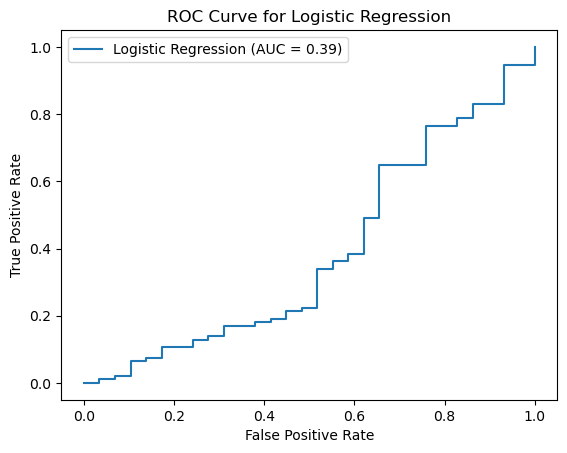

In [62]:
# ROC curve and AUC for the final logistic regression model
fpr, tpr, _ = roc_curve(y_test, pred_prob_final)
auc_value_final = roc_auc_score(y_test, pred_prob_final)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_value_final:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

In [64]:
# Decision Tree Model
tree_model = DecisionTreeClassifier(min_samples_split=10, ccp_alpha=0.005, max_depth=10, random_state=123)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.005, max_depth=10, min_samples_split=10,
                       random_state=123)

In [66]:
# Predict on the test data
tree_pred = tree_model.predict(X_test)

In [68]:
# Confusion matrix for decision tree
tree_conf_matrix = confusion_matrix(y_test, tree_pred)
print("Confusion Matrix for Decision Tree:\n", tree_conf_matrix)

Confusion Matrix for Decision Tree:
 [[ 7 22]
 [23 71]]


In [70]:
# Calculate accuracy, precision, recall, and F1 score for decision tree
tree_accuracy = accuracy_score(y_test, tree_pred)
tree_precision = precision_score(y_test, tree_pred)
tree_recall = recall_score(y_test, tree_pred)
tree_f1_score = f1_score(y_test, tree_pred)

In [74]:
# Print metrics for decision tree
print("Decision Tree Accuracy:", tree_accuracy)
print("Decision Tree Precision:", tree_precision)
print("Decision Tree Recall:", tree_recall)
print("Decision Tree F1 Score:", tree_f1_score)

Decision Tree Accuracy: 0.6341463414634146
Decision Tree Precision: 0.7634408602150538
Decision Tree Recall: 0.7553191489361702
Decision Tree F1 Score: 0.7593582887700534
